# Problem - 1: Perform a classification task with knn from scratch.

### Load the dataset

In [2]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
display(df.head()) #first few rows
display(df.isnull().sum()) #check missing values
display(df.describe()) #summary stats
display(df.nunique())
#No missing values found so no need to drop or to impute any values 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

### Feature Engineering

In [3]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

print("Feature Matrix (X):")
print(X.head())

print("Target Variable (y):")
print(y.head())


Feature Matrix (X):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  
0                     0.627   50  
1                     0.351   31  
2                     0.672   32  
3                     0.167   21  
4                     2.288   33  
Target Variable (y):
0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64


In [4]:
import numpy as np
np.random.seed(42)

train_size = int(0.7 * len(X))
indices = np.random.permutation(len(X))

X_train, X_test = X.iloc[indices[:train_size]], X.iloc[indices[train_size:]]
y_train, y_test = y.iloc[indices[:train_size]], y.iloc[indices[train_size:]]

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [5]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

point1 = np.array([1, 2, 3])
point2 = np.array([4, 5, 6])

distance = euclidean_distance(point1, point2)
print("Euclidean Distance:", distance)

Euclidean Distance: 5.196152422706632


In [6]:
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))
print(euclidean_distance)

<function euclidean_distance at 0x00000265BA609A80>


In [7]:
def predict_class(X_train, y_train, query_point, k):
    distances = [euclidean_distance(query_point, point) for point in X_train.values]
    neighbors = np.argsort(distances)[:k]
    return y_train.iloc[neighbors].mode()[0]

query_point = X_test.iloc[0]
k = 3
predicted_class = predict_class(X_train, y_train, query_point, k)
print("Predicted Class for Query Point:", predicted_class)

def predict_all(X_train, y_train, X_test, k):
    return np.array([predict_class(X_train, y_train, point, k) for point in X_test.values])

y_pred = predict_all(X_train, y_train, X_test, k)
print("Predicted Labels for Test Data:", y_pred)

Predicted Class for Query Point: 0
Predicted Labels for Test Data: [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 0]


In [8]:
def evaluate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

accuracy = evaluate_accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 70.13%


In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Scaled Feature Matrix (X):")
print(X_scaled[:5])

Scaled Feature Matrix (X):
[[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575  0.53090156 -0.69289057 -0.68442195
  -0.36506078 -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 -1.28821221 -0.69289057 -1.10325546
   0.60439732 -0.10558415]
 [-0.84488505 -0.99820778 -0.16054575  0.15453319  0.12330164 -0.49404308
  -0.92076261 -1.04154944]
 [-1.14185152  0.5040552  -1.50468724  0.90726993  0.76583594  1.4097456
   5.4849091  -0.0204964 ]]


In [10]:
y_pred = predict_all(X_train, y_train, X_test, k=3)
print("Predicted Labels:", y_pred)

Predicted Labels: [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 0 1 1 1 0 0
 1 1 1 1 0 0 1 1 0]


In [11]:
accuracy = evaluate_accuracy(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}%')

Accuracy: 70.13%


In [12]:
y_pred_original = predict_all(X_train, y_train, X_test, k=3)
accuracy_original = evaluate_accuracy(y_test, y_pred_original)
print(f'Accuracy on Original Dataset: {accuracy_original:.2f}%')

Accuracy on Original Dataset: 70.13%


In [13]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

y_pred_scaled = predict_all(X_train, y_train, X_test, k=3)
accuracy_scaled = evaluate_accuracy(y_test, y_pred_scaled)
print(f'Accuracy on Scaled Dataset: {accuracy_scaled:.2f}%')

Accuracy on Scaled Dataset: 70.13%


In [14]:
print("Comparison of Results:")
print(f"Original Accuracy: {accuracy_original:.2f}%")
print(f"Scaled Accuracy: {accuracy_scaled:.2f}%")

if accuracy_scaled > accuracy_original:
    print("Scaling improved performance.")
else:
    print("Scaling did not improve performance.")


Comparison of Results:
Original Accuracy: 70.13%
Scaled Accuracy: 70.13%
Scaling did not improve performance.


In [15]:
import time
from sklearn.preprocessing import StandardScaler

# Standardizing the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Function to evaluate accuracy
def evaluate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    accuracy = (correct_predictions / len(y_true)) * 100
    return accuracy

# Record accuracy and time for original dataset
accuracies_original = []
times_original = []

# Record accuracy and time for scaled dataset
accuracies_scaled = []
times_scaled = []

for k in range(1, 16):
    # Measure time for original dataset
    start_time = time.time()
    y_pred_original = predict_all(X_train, y_train, X_test, k)  # Predict for original data
    times_original.append(time.time() - start_time)
    accuracies_original.append(evaluate_accuracy(y_test, y_pred_original))

    # Measure time for scaled dataset
    start_time = time.time()
    y_pred_scaled = predict_all(X_train, y_train, X_test, k)  # Predict for scaled data
    times_scaled.append(time.time() - start_time)
    accuracies_scaled.append(evaluate_accuracy(y_test, y_pred_scaled))

# Print results
print("Accuracies for Original Dataset:", accuracies_original)
print("Accuracies for Scaled Dataset:", accuracies_scaled)
print("Times for Original Dataset:", times_original)
print("Times for Scaled Dataset:", times_scaled)

Accuracies for Original Dataset: [np.float64(64.93506493506493), np.float64(71.42857142857143), np.float64(70.12987012987013), np.float64(74.89177489177489), np.float64(71.42857142857143), np.float64(76.19047619047619), np.float64(73.16017316017316), np.float64(74.89177489177489), np.float64(74.45887445887446), np.float64(73.59307359307358), np.float64(72.72727272727273), np.float64(73.16017316017316), np.float64(74.02597402597402), np.float64(74.89177489177489), np.float64(73.59307359307358)]
Accuracies for Scaled Dataset: [np.float64(64.93506493506493), np.float64(71.42857142857143), np.float64(70.12987012987013), np.float64(74.89177489177489), np.float64(71.42857142857143), np.float64(76.19047619047619), np.float64(73.16017316017316), np.float64(74.89177489177489), np.float64(74.45887445887446), np.float64(73.59307359307358), np.float64(72.72727272727273), np.float64(73.16017316017316), np.float64(74.02597402597402), np.float64(74.89177489177489), np.float64(73.59307359307358)]
Time

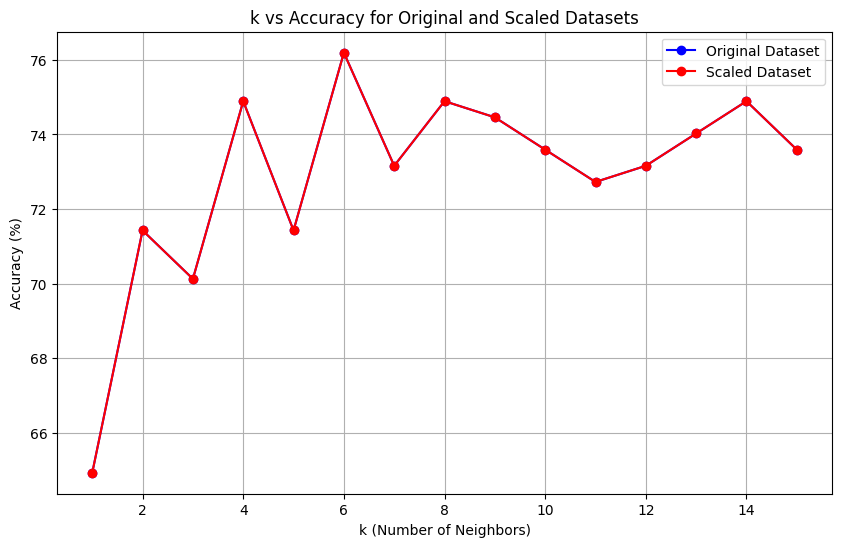

In [16]:
import matplotlib.pyplot as plt

# Plot k vs Accuracy for original and scaled datasets
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), accuracies_original, label="Original Dataset", color='blue', marker='o')
plt.plot(range(1, 16), accuracies_scaled, label="Scaled Dataset", color='red', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy (%)')
plt.title('k vs Accuracy for Original and Scaled Datasets')
plt.legend()
plt.grid(True)
plt.show()

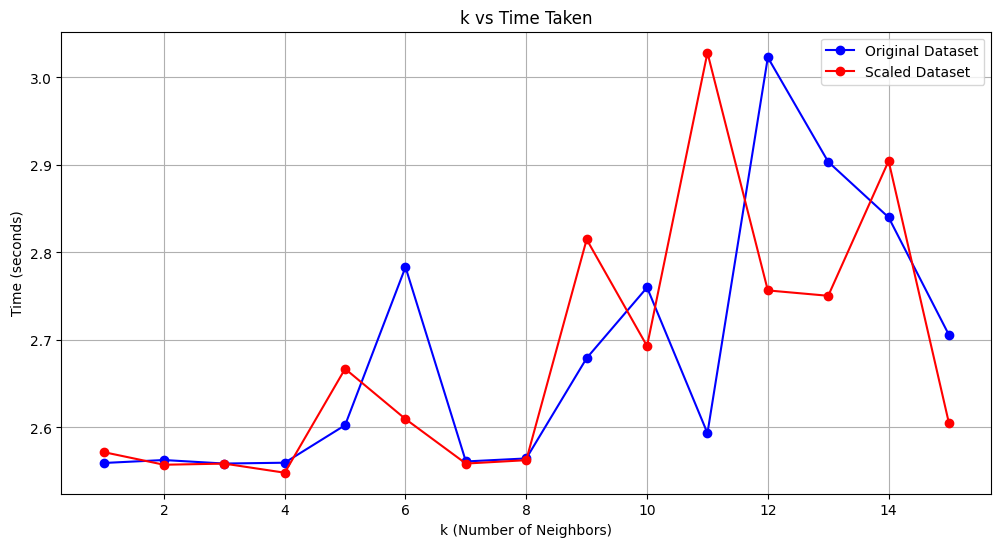

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 16), times_original, label="Original Dataset", color='blue', marker='o')
plt.plot(range(1, 16), times_scaled, label="Scaled Dataset", color='red', marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Time (seconds)')
plt.title('k vs Time Taken')
plt.legend()
plt.grid(True)
plt.show()